# Numerical variables
This example is based on the examples posted on GitHub for [Feature Engineering for Machine Learning Course](https://github.com/solegalli/feature-engineering-for-machine-learning)

Most variables in a dataset can be classified into one of two major types: **Numerical variables** &
**Categorical variables**

**Numerical variables** can be further classified into:
- **Discrete variables** : whole numbers (counts), e.g., Number of children in the family
- **Continuous variables** : may contain any value within a range, eg. house price

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Let's load the loans dataset.
df = pd.read_csv('./datasets/loan.csv')
print(type(df))
df.head()

<class 'pandas.DataFrame'>


,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


# Rename columns
# Variable definitions:
- disbursed_amount: loan amount given to the borrower.
- income: annual income.
- target: loan status (paid or being repaid = 1, defaulted = 0).

In [4]:
df = df.rename(columns={"disbursed_amount": "loan_amount", "income": "annual_income", "target": "loan_status"})
print(df.columns)

Index(['customer_id', 'loan_amount', 'interest', 'market', 'employment',
       'time_employed', 'householder', 'annual_income', 'date_issued',
       'loan_status', 'loan_purpose', 'number_open_accounts',
       'date_last_payment', 'number_credit_lines_12'],
      dtype='str')


## Continuous variables

In [5]:
# Let's look at the values of the variable loan_amount.
# This is the amount of money requested by the borrower. This variable is continuous.
print(df['loan_amount'].unique())
df.describe()

[23201.5   7425.   11150.   ...  6279.   12894.75 25584.  ]


,customer_id,loan_amount,interest,annual_income,loan_status,number_open_accounts,number_credit_lines_12
count,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,238.000000
mean,4999.50000,14132.275500,12.678819,7.157229e+04,0.011700,12.516300,1.785714
std,2886.89568,8058.310311,4.214989,5.286105e+04,0.107537,5.402615,1.197873
min,0.00000,910.000000,4.841200,0.000000e+00,0.000000,1.000000,0.000000
25%,2499.75000,7840.000000,9.490000,4.365000e+04,0.000000,9.000000,1.000000
50%,4999.50000,12375.000000,12.396900,6.045000e+04,0.000000,12.000000,2.000000
75%,7499.25000,19200.000000,15.475500,8.536000e+04,0.000000,15.000000,2.000000
max,9999.00000,35000.000000,27.880000,2.185000e+06,1.000000,49.000000,6.000000


Text(0, 0.5, 'Number of loans')

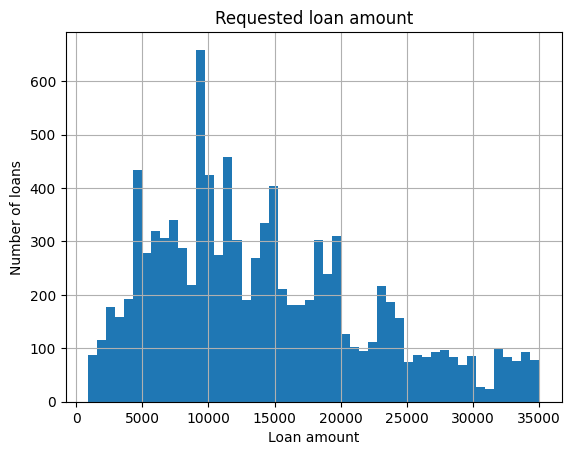

In [6]:
# Let's make a histogram to get familiar with the
# variable distribution.

# A histogram counts of different intervals (or bins) of a continuous variable. 
# The x-axis intervals, while the y-axis shows the frequency or count of 
# observations within each interval.
# Bins are the number of intervals you want to divide all of your data into
fig = df.loan_amount.hist(bins=50)

fig.set_title('Requested loan amount')
fig.set_xlabel('Loan amount')
fig.set_ylabel('Number of loans')

The variable's values vary across the entire value range. This is characteristic of continuous variables.

"\n# Another way to create a histogram with a percentage y-axis is to use the `weights` \n# parameter of the `hist` function \n\nobservations_count = len(df.loan_amount)\n\nfig = df.loan_amount.hist(bins=50, \n    weights= [1/len(df.loan_amount)] * observations_count)\n\nfig.set_title('Requested loan amount probability distribution')\nfig.set_xlabel('Loan amount')\nfig.set_ylabel('Percentage')\n"

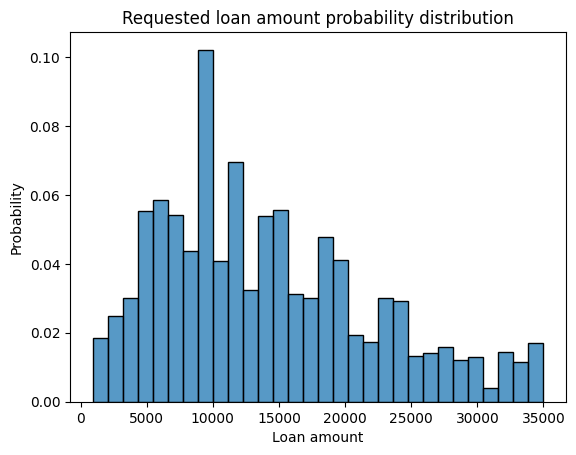

In [7]:
# To create a histogram with a percentage y-axis, 
# The code above is using the `histplot` function from the seaborn library (imported as `sns`) to create a histogram of the "loan_amount" variable from the dataframe `df`.
# The `stat` parameter is set to "probability". 
# This means that the height of each bar will represent the probability 
# of data points falling into that bin, rather than the count of data points. 

ax = sns.histplot(data=df, x="loan_amount", bins=30, stat="probability")
ax.set(title='Requested loan amount probability distribution', 
    xlabel='Loan amount')

"""
# Another way to create a histogram with a percentage y-axis is to use the `weights` 
# parameter of the `hist` function 

observations_count = len(df.loan_amount)

fig = df.loan_amount.hist(bins=50, 
    weights= [1/len(df.loan_amount)] * observations_count)

fig.set_title('Requested loan amount probability distribution')
fig.set_xlabel('Loan amount')
fig.set_ylabel('Percentage')
"""

In [8]:
# Let's examine the variable interest rate,
# This variable is also continuous: it can take, in principle,
# any value within the range.
df['interest'].unique()

array([15.484 , 11.2032,  8.51  , ..., 12.9195, 11.2332, 11.0019],
      shape=(1868,))

In [ ]:
# Let's make a histogram to get familiar with the
# variable distribution.

fig = df['interest'].hist(bins=30)

fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

The variable's values vary continuously across the entire value range.

Text(0, 0.5, 'Number of Customers')

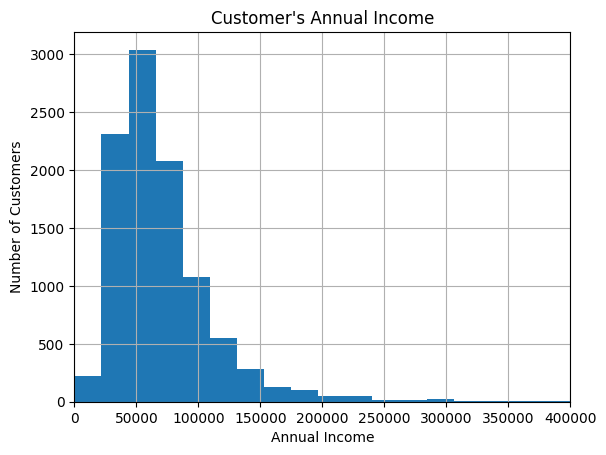

In [9]:
# Now, let's explore the income declared by the customers,
# that is, how much they earn yearly.

# This variable is also continuous.

fig = df['annual_income'].hist(bins=100)

# For better visualisation, I display a specific
# range in the x-axis.
fig.set_xlim(0, 400000)

# title and axis legends
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

Only a few consumers earn greater salaries, with the majority of salaries falling between USD 30 and USD 70,000.
Because this is a continuous variable, the variable's values vary continuously across the variable range.

## Discrete variables

In [10]:
# Let's inspect the values of the number_open_accounts variable.
# This variable represents the borrower's total number of credit items (for example, credit cards, car loans, mortgages, etc.). 
# This is a discrete variable, because a borrower can have 1 credit card, but not 3.5 credit cards.

# Remove missing values using dropna then get unique ones
df['number_open_accounts'].dropna().unique()

array([ 4., 13.,  8., 20., 14.,  5.,  9., 18., 16., 17., 12., 15.,  6.,
       10., 11.,  7., 21., 19., 26.,  2., 22., 27., 23., 25., 24., 28.,
        3., 30., 41., 32., 33., 31., 29., 37., 49., 34., 35., 38.,  1.,
       36., 42., 47., 40., 44., 43.])

number_open_accounts
1.0       2
2.0      12
3.0      47
4.0     142
5.0     254
6.0     438
7.0     627
8.0     755
9.0     877
10.0    890
11.0    894
12.0    850
13.0    721
14.0    598
15.0    522
16.0    454
17.0    374
18.0    306
19.0    221
20.0    209
21.0    155
22.0    113
23.0    104
24.0    102
25.0     58
26.0     69
27.0     49
28.0     31
29.0     29
30.0     14
31.0     20
32.0      9
33.0      8
34.0     12
35.0      6
36.0      7
37.0      4
38.0      3
40.0      1
41.0      2
42.0      4
43.0      2
44.0      2
47.0      1
49.0      2
Name: count, dtype: int64


Text(0, 0.5, 'Number of Customers')

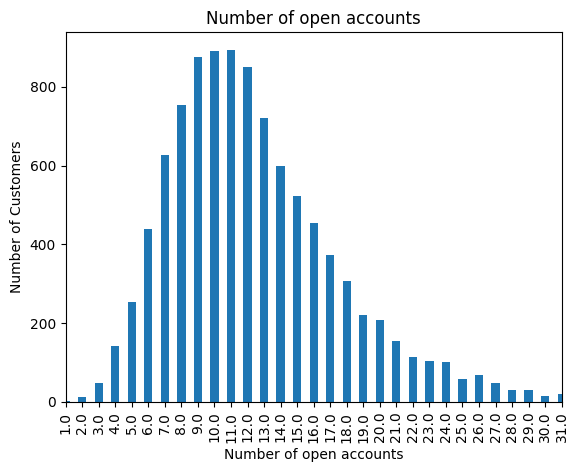

In [11]:
# Let's make an histogram to get familiar with the variable distribution.
y = df['number_open_accounts'].value_counts().sort_index()
print(y)
fig = y.plot.bar()

# For better visualisation, I display a specific
# value range in the x-axis.
fig.set_xlim(0, 30)

# Title and axis labels.
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

Use a bar chart for discrete variables and histograms for continuous variables